In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [4]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import UpSampling2D, Conv2D

In [5]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D,LeakyReLU
import sys

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

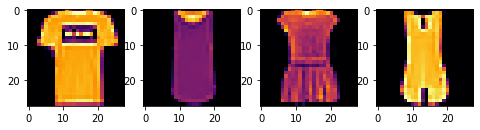

In [7]:
def plt_test(xtrain=x_train,columns = 4,rows = 1):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(x_train[i],cmap="inferno")
    plt.show()
    
plt_test()

In [9]:
def build_generator():
    img_shape = (28, 28, 1)
    latent_dim = 100

    model = Sequential()

    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(2048))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

    model.summary()

    noise = Input(shape=(latent_dim,))
    img = model(noise)

    return Model(noise, img)

In [10]:
generator = build_generator()
z = Input(shape=(100,))
img = generator(z)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              5

In [11]:
def build_discriminator():
    img_shape = (28, 28, 1)
    latent_dim = 100

    model = Sequential()

    model.add(Flatten(input_shape=img_shape))
    
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))

#     model.add(Dense(2048))
#     model.add(LeakyReLU(alpha=0.2))

    
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    img = Input(shape=img_shape)
    validity = model(img)

    return Model(img, validity)   

In [12]:
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              263168    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 1024)             

In [13]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [14]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='inferno')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

In [15]:
x_train = x_train / 127.5 - 1.
x_train = np.expand_dims(x_train, axis=3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
0 [D loss: 0.639396, acc.: 48.44%] [G loss: 0.594250]


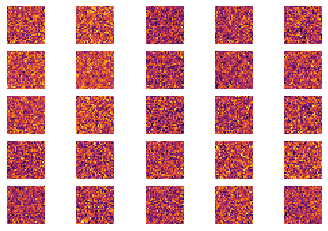

50 [D loss: 0.004671, acc.: 100.00%] [G loss: 6.343256]


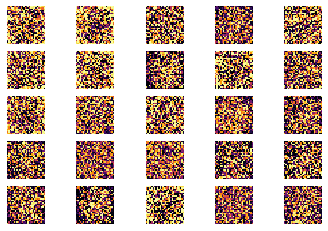

100 [D loss: 0.047155, acc.: 98.44%] [G loss: 9.757526]


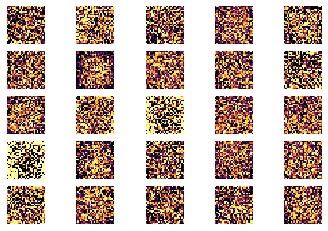

150 [D loss: 0.253730, acc.: 87.50%] [G loss: 8.356489]


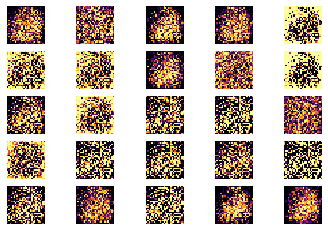

200 [D loss: 0.182311, acc.: 93.75%] [G loss: 6.480471]


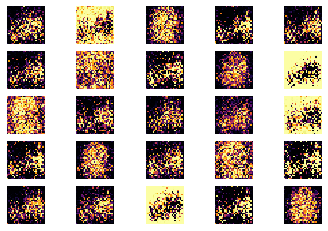

250 [D loss: 0.392690, acc.: 81.25%] [G loss: 6.414727]


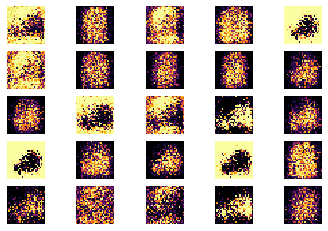

300 [D loss: 0.558492, acc.: 70.31%] [G loss: 4.121386]


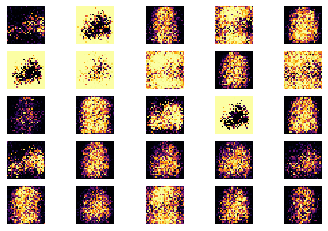

350 [D loss: 0.543729, acc.: 64.06%] [G loss: 3.602996]


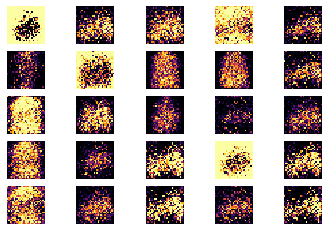

400 [D loss: 0.481381, acc.: 81.25%] [G loss: 3.282633]


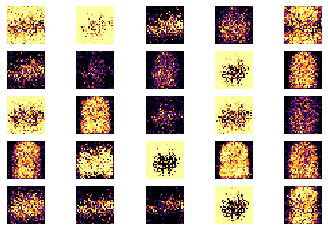

450 [D loss: 0.598408, acc.: 67.19%] [G loss: 3.408051]


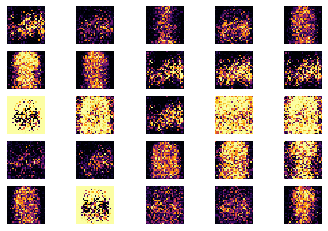

500 [D loss: 0.545642, acc.: 73.44%] [G loss: 3.548241]


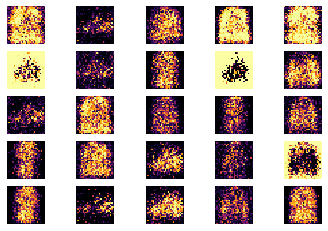

550 [D loss: 0.498984, acc.: 73.44%] [G loss: 3.887763]


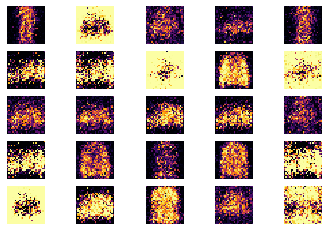

600 [D loss: 0.516006, acc.: 76.56%] [G loss: 2.968842]


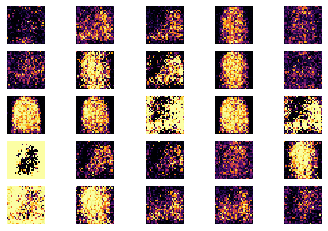

650 [D loss: 0.658941, acc.: 65.62%] [G loss: 2.154429]


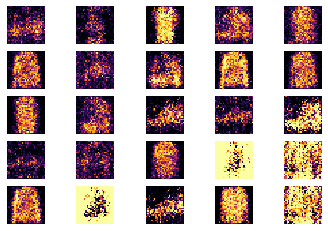

700 [D loss: 0.620218, acc.: 65.62%] [G loss: 1.669880]


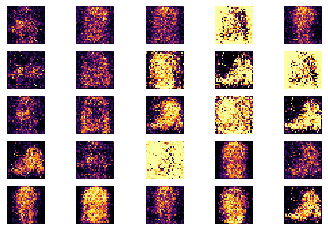

750 [D loss: 0.441011, acc.: 76.56%] [G loss: 2.519362]


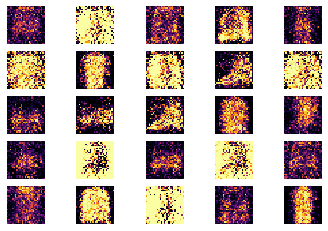

800 [D loss: 0.308119, acc.: 92.19%] [G loss: 2.078893]


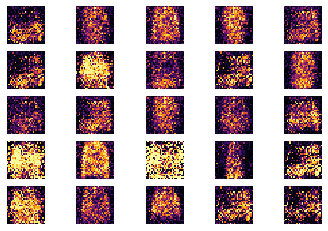

850 [D loss: 0.328202, acc.: 89.06%] [G loss: 2.396120]


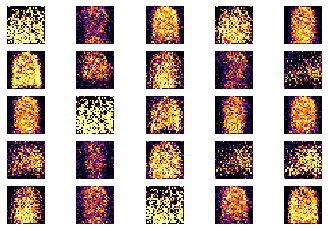

900 [D loss: 0.691598, acc.: 65.62%] [G loss: 1.684431]


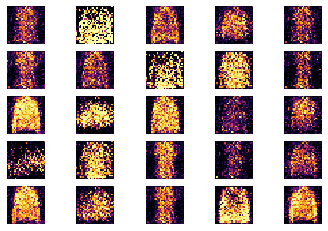

950 [D loss: 0.584355, acc.: 68.75%] [G loss: 1.793841]


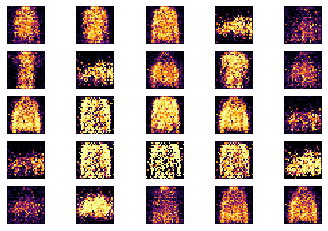

1000 [D loss: 0.589770, acc.: 73.44%] [G loss: 1.583122]


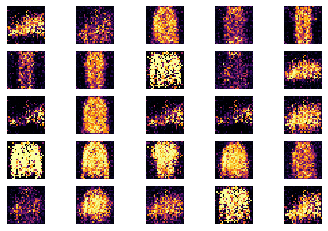

1050 [D loss: 0.569493, acc.: 73.44%] [G loss: 0.989677]


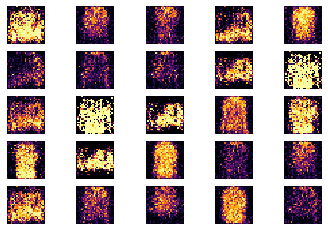

1100 [D loss: 0.690288, acc.: 54.69%] [G loss: 1.056869]


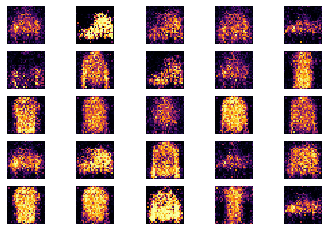

1150 [D loss: 0.601737, acc.: 68.75%] [G loss: 1.044350]


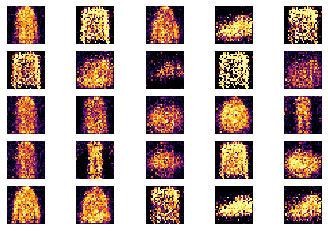

1200 [D loss: 0.500315, acc.: 78.12%] [G loss: 1.305440]


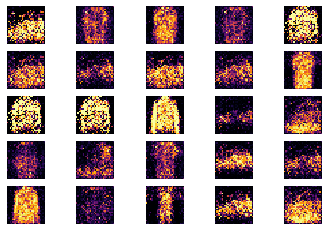

1250 [D loss: 0.599561, acc.: 68.75%] [G loss: 1.023437]


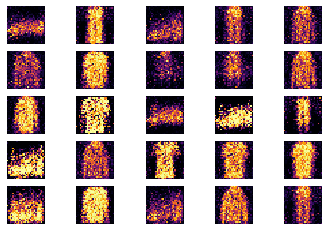

1300 [D loss: 0.627965, acc.: 70.31%] [G loss: 1.092679]


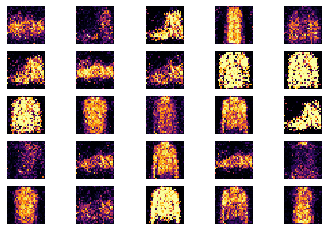

1350 [D loss: 0.603822, acc.: 70.31%] [G loss: 0.937968]


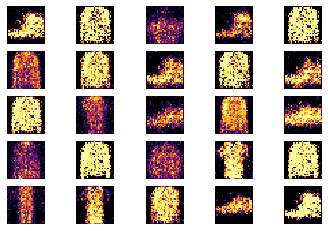

1400 [D loss: 0.593514, acc.: 67.19%] [G loss: 0.945449]


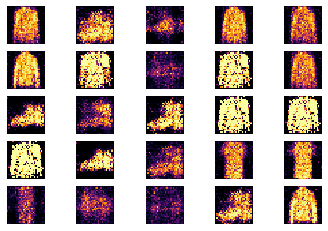

1450 [D loss: 0.554268, acc.: 70.31%] [G loss: 0.991968]


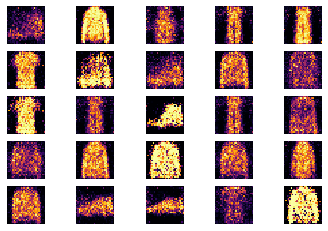

1500 [D loss: 0.595793, acc.: 64.06%] [G loss: 0.992574]


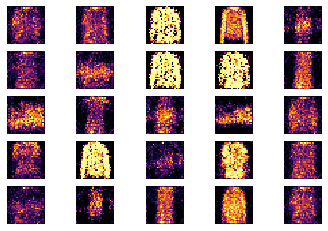

1550 [D loss: 0.634521, acc.: 64.06%] [G loss: 0.931391]


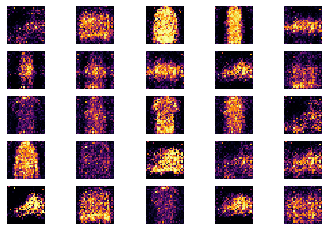

1600 [D loss: 0.619370, acc.: 65.62%] [G loss: 0.988142]


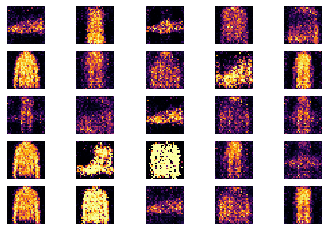

1650 [D loss: 0.544253, acc.: 71.88%] [G loss: 1.041263]


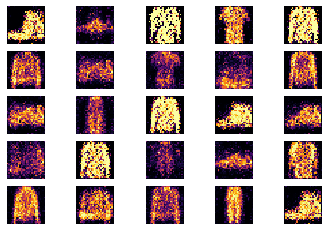

1700 [D loss: 0.626856, acc.: 57.81%] [G loss: 1.005247]


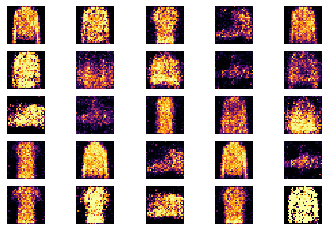

1750 [D loss: 0.666094, acc.: 60.94%] [G loss: 1.087392]


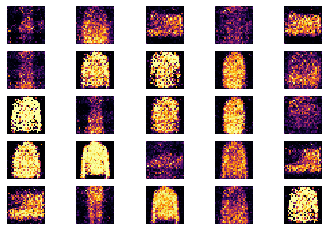

1800 [D loss: 0.609204, acc.: 64.06%] [G loss: 0.934736]


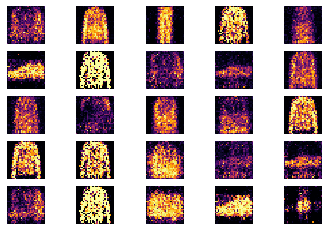

1850 [D loss: 0.544829, acc.: 78.12%] [G loss: 1.019230]


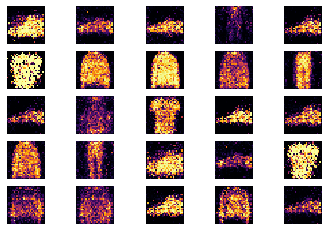

1900 [D loss: 0.610435, acc.: 65.62%] [G loss: 1.018310]


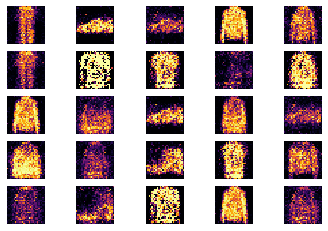

1950 [D loss: 0.534240, acc.: 79.69%] [G loss: 1.013704]


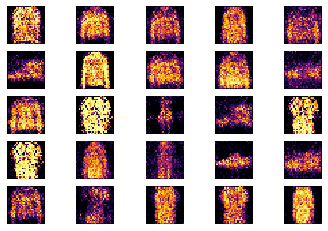

2000 [D loss: 0.551216, acc.: 68.75%] [G loss: 0.925142]


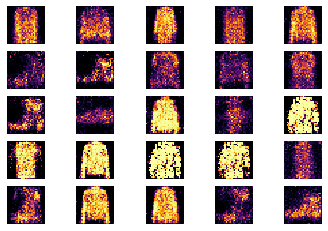

2050 [D loss: 0.534350, acc.: 70.31%] [G loss: 1.112773]


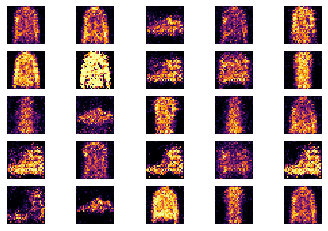

2100 [D loss: 0.641223, acc.: 60.94%] [G loss: 1.139083]


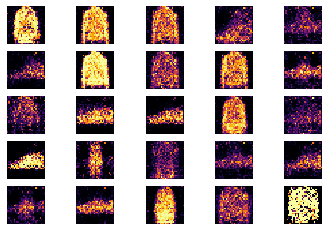

2150 [D loss: 0.663537, acc.: 60.94%] [G loss: 0.975208]


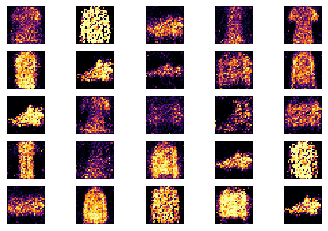

2200 [D loss: 0.576038, acc.: 70.31%] [G loss: 1.027340]


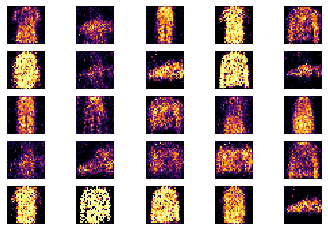

2250 [D loss: 0.638396, acc.: 65.62%] [G loss: 1.174679]


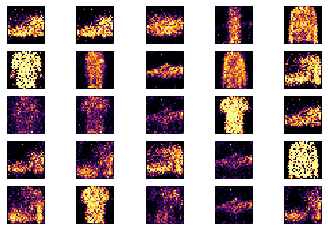

2300 [D loss: 0.661367, acc.: 57.81%] [G loss: 1.013901]


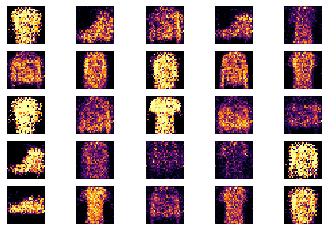

2350 [D loss: 0.625334, acc.: 68.75%] [G loss: 1.024358]


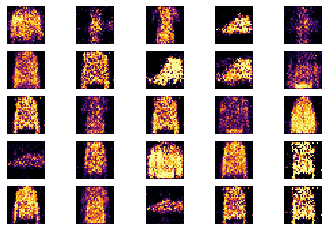

2400 [D loss: 0.635479, acc.: 62.50%] [G loss: 0.999589]


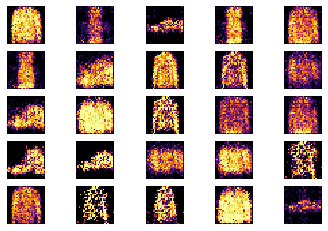

2450 [D loss: 0.626653, acc.: 62.50%] [G loss: 0.968793]


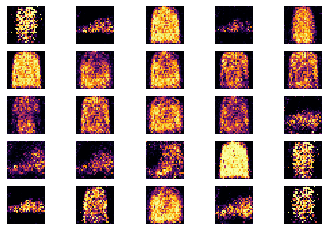

2500 [D loss: 0.620917, acc.: 70.31%] [G loss: 0.977479]


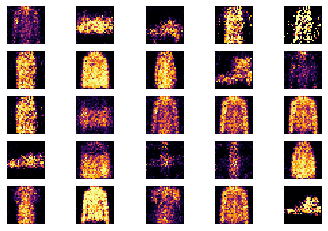

2550 [D loss: 0.662871, acc.: 60.94%] [G loss: 1.013367]


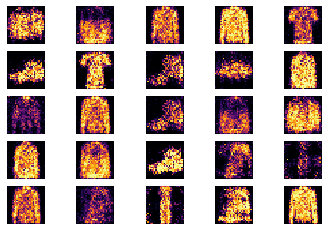

2600 [D loss: 0.616993, acc.: 64.06%] [G loss: 1.029653]


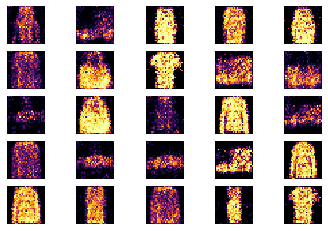

2650 [D loss: 0.665367, acc.: 57.81%] [G loss: 0.897356]


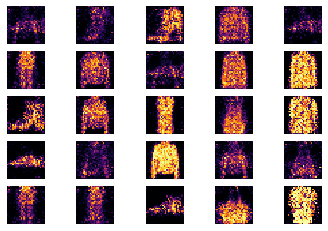

2700 [D loss: 0.646854, acc.: 64.06%] [G loss: 0.946594]


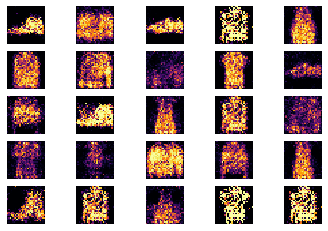

2750 [D loss: 0.555882, acc.: 75.00%] [G loss: 0.982710]


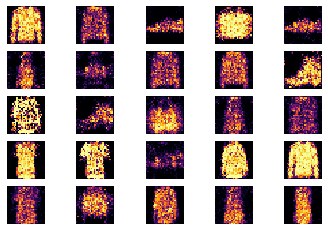

2800 [D loss: 0.531934, acc.: 78.12%] [G loss: 1.026344]


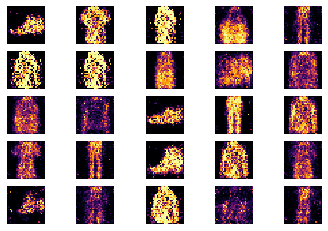

2850 [D loss: 0.684520, acc.: 48.44%] [G loss: 0.940658]


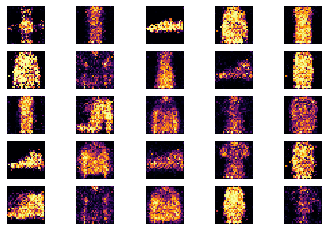

2900 [D loss: 0.604802, acc.: 67.19%] [G loss: 1.037169]


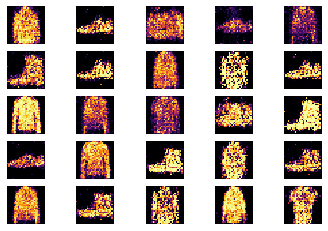

2950 [D loss: 0.654320, acc.: 60.94%] [G loss: 1.019585]


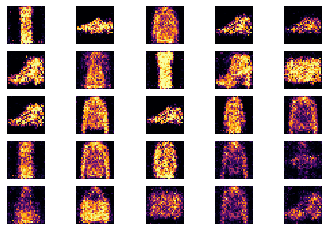

3000 [D loss: 0.670141, acc.: 54.69%] [G loss: 0.915924]


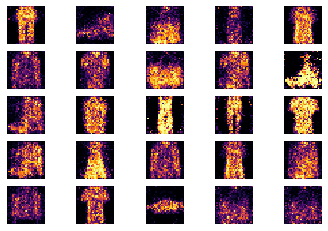

3050 [D loss: 0.630228, acc.: 64.06%] [G loss: 1.068046]


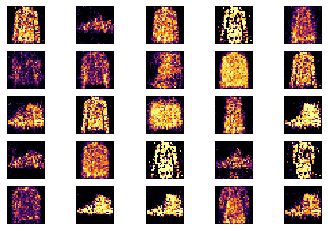

3100 [D loss: 0.664784, acc.: 57.81%] [G loss: 1.003930]


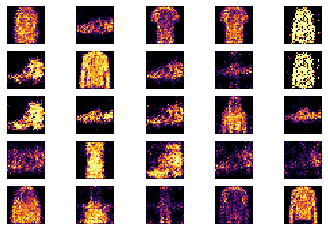

3150 [D loss: 0.567162, acc.: 71.88%] [G loss: 0.980685]


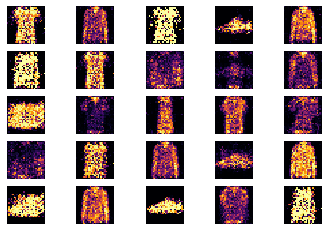

3200 [D loss: 0.577433, acc.: 68.75%] [G loss: 1.088617]


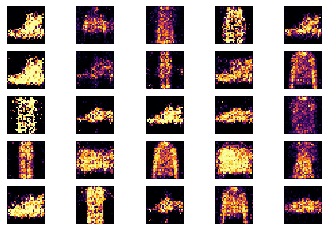

3250 [D loss: 0.555126, acc.: 79.69%] [G loss: 1.082030]


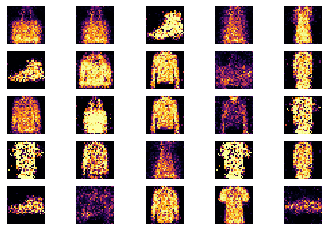

3300 [D loss: 0.693788, acc.: 54.69%] [G loss: 1.201360]


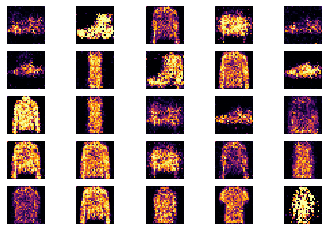

3350 [D loss: 0.648544, acc.: 68.75%] [G loss: 1.010253]


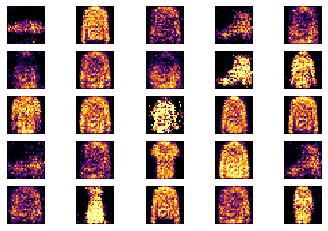

3400 [D loss: 0.576513, acc.: 70.31%] [G loss: 1.111396]


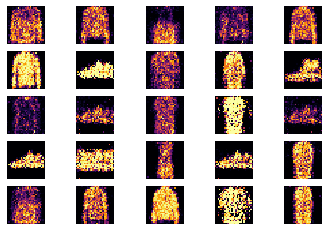

3450 [D loss: 0.637994, acc.: 59.38%] [G loss: 1.170352]


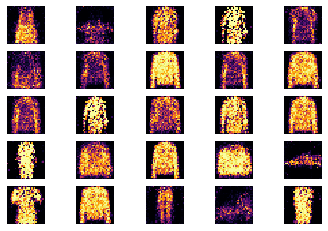

3500 [D loss: 0.681501, acc.: 56.25%] [G loss: 1.207927]


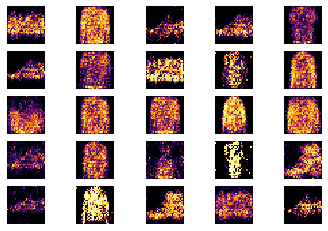

3550 [D loss: 0.589732, acc.: 70.31%] [G loss: 1.129661]


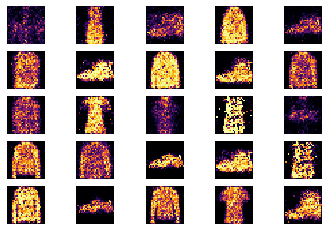

3600 [D loss: 0.652919, acc.: 65.62%] [G loss: 1.125376]


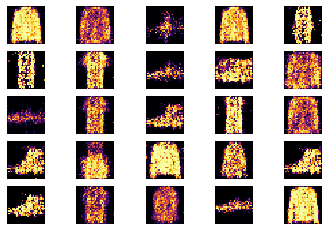

3650 [D loss: 0.603764, acc.: 57.81%] [G loss: 1.214398]


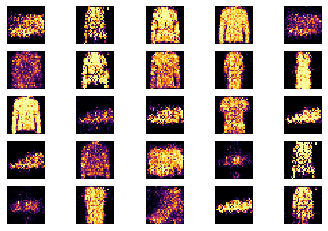

3700 [D loss: 0.551393, acc.: 71.88%] [G loss: 1.038169]


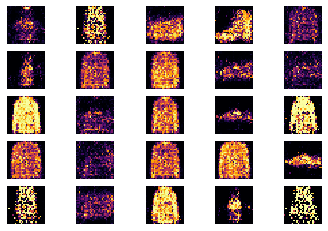

3750 [D loss: 0.716065, acc.: 53.12%] [G loss: 1.013778]


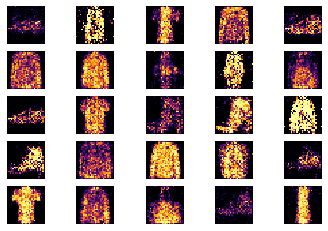

3800 [D loss: 0.652713, acc.: 65.62%] [G loss: 1.091675]


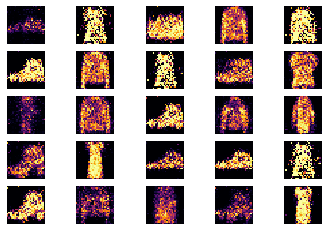

3850 [D loss: 0.579719, acc.: 62.50%] [G loss: 1.161159]


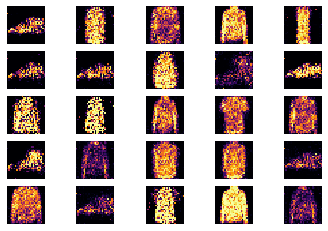

3900 [D loss: 0.655365, acc.: 59.38%] [G loss: 0.957827]


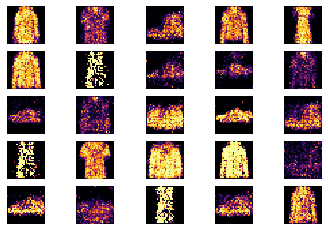

3950 [D loss: 0.613003, acc.: 68.75%] [G loss: 1.021631]


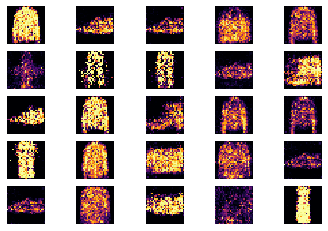

4000 [D loss: 0.686352, acc.: 50.00%] [G loss: 1.123711]


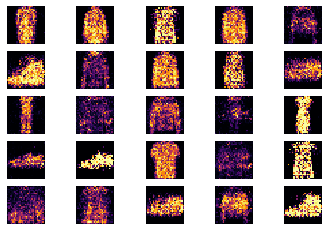

4050 [D loss: 0.600106, acc.: 70.31%] [G loss: 1.161419]


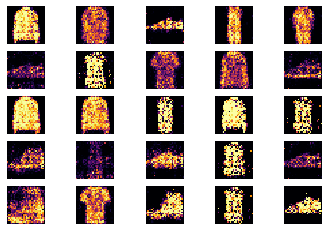

4100 [D loss: 0.670348, acc.: 62.50%] [G loss: 0.988465]


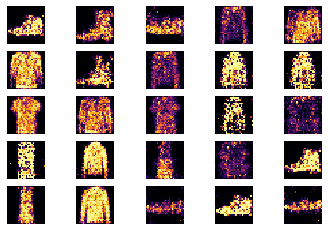

4150 [D loss: 0.667660, acc.: 64.06%] [G loss: 1.108984]


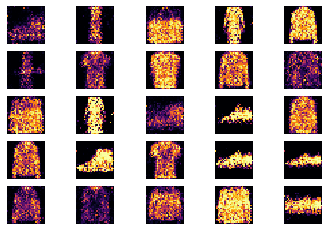

4200 [D loss: 0.696679, acc.: 62.50%] [G loss: 0.990272]


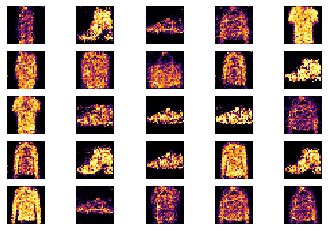

4250 [D loss: 0.563589, acc.: 71.88%] [G loss: 1.033974]


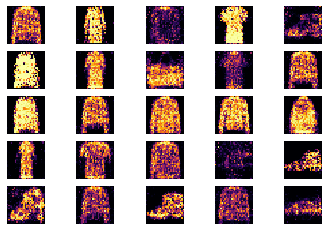

4300 [D loss: 0.630363, acc.: 62.50%] [G loss: 1.088727]


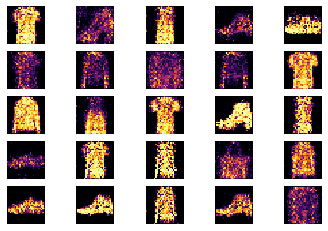

4350 [D loss: 0.586631, acc.: 67.19%] [G loss: 1.173023]


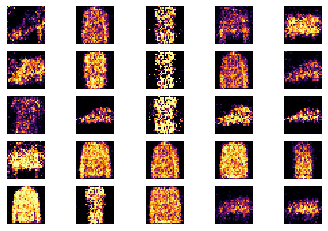

4400 [D loss: 0.655849, acc.: 60.94%] [G loss: 0.924211]


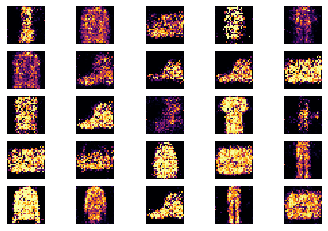

4450 [D loss: 0.620275, acc.: 71.88%] [G loss: 0.995773]


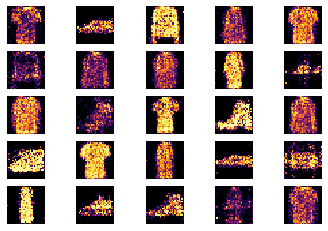

4500 [D loss: 0.607405, acc.: 65.62%] [G loss: 0.978099]


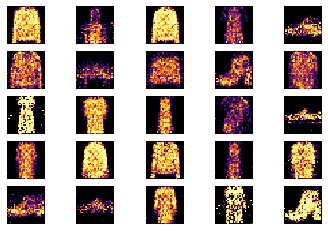

4550 [D loss: 0.689494, acc.: 56.25%] [G loss: 1.075399]


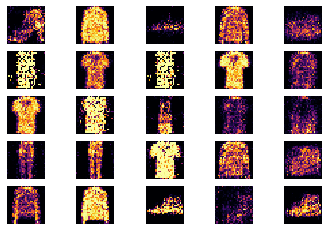

4600 [D loss: 0.553574, acc.: 75.00%] [G loss: 1.131795]


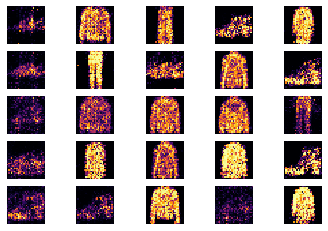

4650 [D loss: 0.597062, acc.: 70.31%] [G loss: 1.080391]


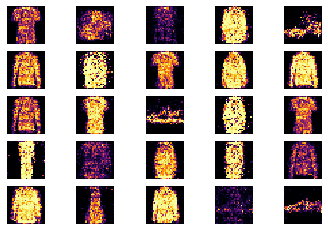

4700 [D loss: 0.615453, acc.: 70.31%] [G loss: 1.018942]


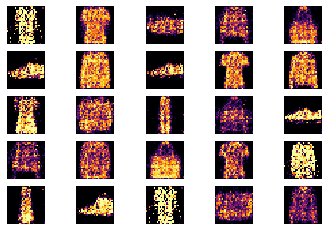

4750 [D loss: 0.531872, acc.: 71.88%] [G loss: 1.027048]


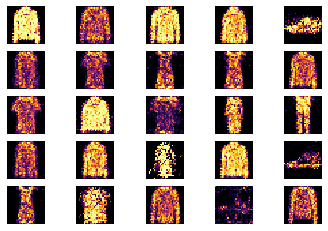

4800 [D loss: 0.569264, acc.: 78.12%] [G loss: 1.049397]


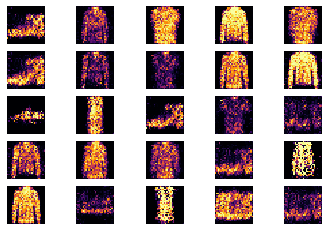

4850 [D loss: 0.572500, acc.: 64.06%] [G loss: 1.011645]


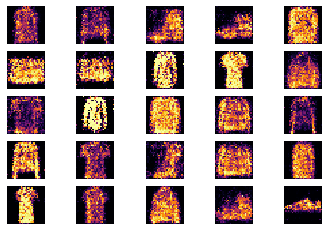

4900 [D loss: 0.600408, acc.: 68.75%] [G loss: 1.026938]


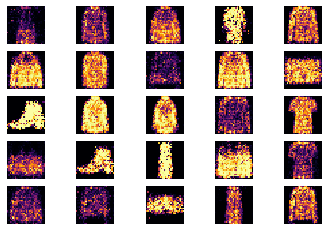

4950 [D loss: 0.608294, acc.: 65.62%] [G loss: 1.062977]


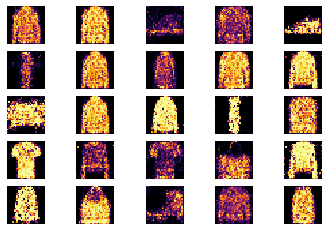

In [16]:
epochs = 5000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  if epoch % 50 == 0:
    print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
    sample_images(epoch)

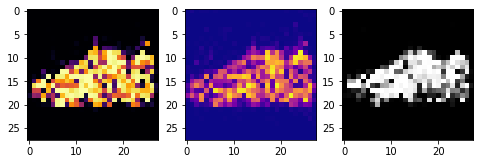

In [20]:

r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = .5*gen_imgs+.5

plt.figure(figsize=(8, 8))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='inferno')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='plasma')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()

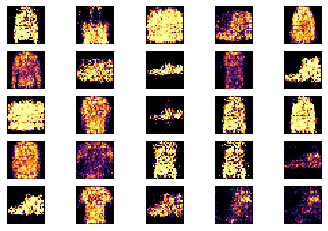

In [18]:
sample_images(69)